<a id="0"></a> <br>
# Table of Contents  
1. [Data preprocessing](#1)     
2. [Creating and training the model](#2)

In [1]:
#%load_ext nb_black

In [2]:
pip install pandas

     ---------------------------------------- 11.6/11.6 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 505.5/505.5 KB 5.3 MB/s eta 0:00:00
     -------------------------------------- 345.4/345.4 KB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Sereb\OneDrive\Рабочий стол\folder\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np

<a id="1"></a>
## Data preprocessing
[Back to the top](#0)

In [6]:
pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Sereb\OneDrive\Рабочий стол\folder\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
data_google = pd.read_excel('search_results.xlsx')
data_google.shape

(8205, 8)

In [4]:
data_google.head(5)

,title,link,displayed_link,snippet,keywords,position,language,timestamp
0,Hairpin-Technologie,https://de.wikipedia.org/wiki/Hairpin-Technologie,https://de.wikipedia.org,... Kontaktieren von Statoren für elektrische ...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14
1,EP2858212B1 - Wickelverfahren für eine Statorw...,https://patents.google.com/patent/EP2858212B1/de,https://patents.google.com,[0006]. Insbesondere das Verbinden der Leiterd...,"stator wicklung elektrisch draht spule phase ""...",1,de,04/04/2024 17:14
2,DE10321956A1 - Hairpin wound stator for electr...,https://patents.google.com/patent/DE10321956A1/en,https://patents.google.com,... verbinden. Ein Prototyp dieser Technologie...,"stator wicklung draht spule phase ""verbinden"" ...",1,de,04/04/2024 17:14
3,Stator und Verfahren zur Herstellung eines Sta...,https://patents.google.com/patent/DE1020191113...,https://patents.google.com,Zur Kontaktierung ist eine Kontakteinrichtung ...,stator wicklung draht spule wicklungsende phas...,1,de,04/04/2024 17:14
4,risomat - Prozesse,https://www.risomat.de/prozesse/,https://www.risomat.de,Für das Wickeln von Spulen für Stator-und Roto...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14


Check if our dataset has missing values and duplicates.

In [5]:
data_google.isnull().sum()

title              0
link               0
displayed_link     0
snippet           31
keywords           0
position           0
language           0
timestamp          0
dtype: int64

In [6]:
data_google = data_google.dropna(how='any',axis=0)

In [7]:
data_google.isnull().sum()

title             0
link              0
displayed_link    0
snippet           0
keywords          0
position          0
language          0
timestamp         0
dtype: int64

In [8]:
data_google.duplicated().sum()

0

Remove stopwords from `title` and `snippet`.

In [9]:
stop_words_english = set(stopwords.words('english'))
stop_words_german = set(stopwords.words('german'))

In [10]:
data_google['title_cleaned'] = data_google['title'].astype(str)
data_google['snippet_cleaned'] = data_google['snippet'].astype(str)

Convert words to lowercase.

In [11]:
data_google['title_cleaned'] = data_google['title_cleaned'].str.lower()
data_google['snippet_cleaned'] = data_google['snippet_cleaned'].str.lower()

In [12]:
data_google["title_cleaned"] = np.where(data_google['language']=='en', 
                                          data_google['title_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_english)])), 
                                          data_google['title_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_german)])))

In [13]:
data_google["snippet_cleaned"] = np.where(data_google['language']=='en', 
                                          data_google['snippet_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_english)])), 
                                          data_google['snippet_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_german)])))

In [14]:
data_google.head(5)

,title,link,displayed_link,snippet,keywords,position,language,timestamp,title_cleaned,snippet_cleaned
0,Hairpin-Technologie,https://de.wikipedia.org/wiki/Hairpin-Technologie,https://de.wikipedia.org,... Kontaktieren von Statoren für elektrische ...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,hairpin-technologie,... kontaktieren statoren elektrische antriebe...
1,EP2858212B1 - Wickelverfahren für eine Statorw...,https://patents.google.com/patent/EP2858212B1/de,https://patents.google.com,[0006]. Insbesondere das Verbinden der Leiterd...,"stator wicklung elektrisch draht spule phase ""...",1,de,04/04/2024 17:14,ep2858212b1 - wickelverfahren statorwicklung ...,[0006]. insbesondere verbinden leiterdrähte ei...
2,DE10321956A1 - Hairpin wound stator for electr...,https://patents.google.com/patent/DE10321956A1/en,https://patents.google.com,... verbinden. Ein Prototyp dieser Technologie...,"stator wicklung draht spule phase ""verbinden"" ...",1,de,04/04/2024 17:14,de10321956a1 - hairpin wound stator for electr...,... verbinden. prototyp technologie ... wicklu...
3,Stator und Verfahren zur Herstellung eines Sta...,https://patents.google.com/patent/DE1020191113...,https://patents.google.com,Zur Kontaktierung ist eine Kontakteinrichtung ...,stator wicklung draht spule wicklungsende phas...,1,de,04/04/2024 17:14,stator verfahren herstellung stators,kontaktierung kontakteinrichtung stirnseitig s...
4,risomat - Prozesse,https://www.risomat.de/prozesse/,https://www.risomat.de,Für das Wickeln von Spulen für Stator-und Roto...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,risomat - prozesse,wickeln spulen stator-und rotorwicklungen komm...


Get rid of non-alphabetic characters.

In [15]:
data_google['title_cleaned'] = data_google['title_cleaned'].replace(to_replace ='[^a-zA-ZäöüÄÖÜß ]', value = '', regex = True)
data_google['snippet_cleaned'] = data_google['snippet_cleaned'].replace(to_replace ='[^a-zA-ZäöüÄÖÜß ]', value = '', regex = True)

If a sentence is only one or two words long, the benefit for the training is very small. Therefore we remove this short words.

In [16]:
data_google['title_cleaned'] = data_google['title_cleaned'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) > 2))
data_google['snippet_cleaned'] = data_google['snippet_cleaned'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) > 2))

In [17]:
data_google.head(5)

,title,link,displayed_link,snippet,keywords,position,language,timestamp,title_cleaned,snippet_cleaned
0,Hairpin-Technologie,https://de.wikipedia.org/wiki/Hairpin-Technologie,https://de.wikipedia.org,... Kontaktieren von Statoren für elektrische ...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,hairpintechnologie,kontaktieren statoren elektrische antriebe fap...
1,EP2858212B1 - Wickelverfahren für eine Statorw...,https://patents.google.com/patent/EP2858212B1/de,https://patents.google.com,[0006]. Insbesondere das Verbinden der Leiterd...,"stator wicklung elektrisch draht spule phase ""...",1,de,04/04/2024 17:14,epb wickelverfahren statorwicklung,insbesondere verbinden leiterdrähte einzelnen ...
2,DE10321956A1 - Hairpin wound stator for electr...,https://patents.google.com/patent/DE10321956A1/en,https://patents.google.com,... verbinden. Ein Prototyp dieser Technologie...,"stator wicklung draht spule phase ""verbinden"" ...",1,de,04/04/2024 17:14,dea hairpin wound stator for electric machine,verbinden prototyp technologie wicklung phase ...
3,Stator und Verfahren zur Herstellung eines Sta...,https://patents.google.com/patent/DE1020191113...,https://patents.google.com,Zur Kontaktierung ist eine Kontakteinrichtung ...,stator wicklung draht spule wicklungsende phas...,1,de,04/04/2024 17:14,stator verfahren herstellung stators,kontaktierung kontakteinrichtung stirnseitig s...
4,risomat - Prozesse,https://www.risomat.de/prozesse/,https://www.risomat.de,Für das Wickeln von Spulen für Stator-und Roto...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,risomat prozesse,wickeln spulen statorund rotorwicklungen kommt...


Tokenize `title_cleaned` and `snippet_cleaned` columns.

In [18]:
tokenized_sentences_domain = {}
all_tokenized_sentences = []
#tokenize
for index, row in data_google.iterrows(): 
    sentences = [row['title_cleaned']] + sent_tokenize(row['snippet_cleaned'].replace('...', '.'))
    tokenizer = RegexpTokenizer(r'\w+')
    for s in sentences:
        all_tokenized_sentences.append(tokenizer.tokenize(s))

In [19]:
from collections import defaultdict
word_freq = defaultdict(int)
for sent in all_tokenized_sentences:
    for i in sent:
        word_freq[i] += 1

sorted(word_freq, key=word_freq.get, reverse=True)[:15]

['stator',
 'winding',
 'motor',
 'phase',
 'coil',
 'wire',
 'electric',
 'contact',
 'connection',
 'wicklung',
 'attach',
 'connect',
 'windings',
 'befestigen',
 'rotor']

We see that there are no punctuation marks, numbers, and service words in the graph, which indicates that the text processing is correct.

<a id="2"></a>
## Word2vec for finding most similar words to a word
[Back to the top](#0)

Let's create bigrams for our model.

In [20]:
bigram = Phrases(all_tokenized_sentences, min_count=5, delimiter='_')

In [21]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# init callback class
class callback(CallbackAny2Vec):
    '''Callback for Word2vec with resetting loss on the end of each epoch.'''

    def __init__(self):
        self.epoch = 1

        self.epoch = 1
        self.losses = []
        self.cumu_loss = 0.0
        self.previous_epoch_time = time.time()

        self.best_model = None
        self.best_loss = 1e+30

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()

        norms = [np.linalg.norm(v) for v in model.wv.vectors]
        now = time.time()
        epoch_seconds = now - self.previous_epoch_time
        self.previous_epoch_time = now
        self.cumu_loss += float(loss)
        print(f"Loss after epoch{self.epoch}: {loss} (cumulative loss: {self.cumu_loss}) "+\
              f"duration {round(epoch_seconds, 2)}s - vector norms min/avg/max: "+\
              f"{round(float(min(norms)), 2)} / {round(float(sum(norms)/len(norms)), 2)} / {round(float(max(norms)), 2)}")
        self.epoch += 1

        self.losses.append(float(loss))

        # reset loss inside model
        model.running_training_loss = 0.0

        if loss < self.best_loss:
            #self.best_model = copy.deepcopy(model)
            self.best_loss = loss

        if self.epoch % 61 == 0:
            self.plot()

    def plot(self):
        fig, (ax1) = plt.subplots(ncols=1, figsize=(3, 3))
        ax1.plot(self.losses)
        ax1.set_xlabel("Epochs")
        ax1.set_title("Training loss")
        plt.show()

Now we can train the model.

2024-05-06 14:54:55,941 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.03>', 'datetime': '2024-05-06T14:54:55.941231', 'gensim': '4.3.2', 'python': '3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}
2024-05-06 14:54:55,941 : INFO : collecting all words and their counts


2024-05-06 14:54:55,946 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-05-06 14:54:56,266 : INFO : PROGRESS: at sentence #10000, processed 75021 words, keeping 19760 word types
2024-05-06 14:54:56,444 : INFO : collected 24551 word types from a corpus of 131636 raw words and 16348 sentences
2024-05-06 14:54:56,444 : INFO : Creating a fresh vocabulary
2024-05-06 14:54:56,474 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 2049 unique words (8.35% of original 24551, drops 22502)', 'datetime': '2024-05-06T14:54:56.474203', 'gensim': '4.3.2', 'python': '3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'prepare_vocab'}
2024-05-06 14:54:56,474 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 leaves 86443 word corpus (65.67% of original 131636, drops 45193)', 'datetime': '2024-05-06T14:54:56.474203', 'gensim': '4.3.2', 'python': '3.9.13

Loss after epoch1: 305536.78125 (cumulative loss: 305536.78125) duration 1.14s - vector norms min/avg/max: 0.03 / 0.22 / 1.28


2024-05-06 14:54:58,742 : INFO : EPOCH 1 - PROGRESS: at 98.83% examples, 31601 words/s, in_qsize 1, out_qsize 0
2024-05-06 14:54:58,756 : INFO : EPOCH 1: training on 131636 raw words (33884 effective words) took 1.1s, 31787 effective words/s


Loss after epoch2: 238539.90625 (cumulative loss: 544076.6875) duration 1.13s - vector norms min/avg/max: 0.03 / 0.9 / 1.94


2024-05-06 14:54:59,884 : INFO : EPOCH 2 - PROGRESS: at 78.30% examples, 23171 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:00,104 : INFO : EPOCH 2: training on 131636 raw words (33889 effective words) took 1.3s, 26350 effective words/s


Loss after epoch3: 197198.734375 (cumulative loss: 741275.421875) duration 1.31s - vector norms min/avg/max: 0.03 / 1.12 / 2.42


2024-05-06 14:55:01,103 : INFO : EPOCH 3: training on 131636 raw words (33824 effective words) took 1.0s, 34570 effective words/s


Loss after epoch4: 191225.640625 (cumulative loss: 932501.0625) duration 1.05s - vector norms min/avg/max: 0.03 / 1.19 / 2.73


2024-05-06 14:55:02,182 : INFO : EPOCH 4 - PROGRESS: at 78.30% examples, 24824 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:02,492 : INFO : EPOCH 4: training on 131636 raw words (33978 effective words) took 1.3s, 25861 effective words/s


Loss after epoch5: 192717.546875 (cumulative loss: 1125218.609375) duration 1.38s - vector norms min/avg/max: 0.03 / 1.2 / 3.01


2024-05-06 14:55:03,575 : INFO : EPOCH 5 - PROGRESS: at 71.46% examples, 21765 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:03,970 : INFO : EPOCH 5: training on 131636 raw words (33816 effective words) took 1.4s, 24110 effective words/s


Loss after epoch6: 189717.1875 (cumulative loss: 1314935.796875) duration 1.48s - vector norms min/avg/max: 0.03 / 1.21 / 3.19


2024-05-06 14:55:04,714 : INFO : EPOCH 6: training on 131636 raw words (33961 effective words) took 0.7s, 49634 effective words/s


Loss after epoch7: 191516.953125 (cumulative loss: 1506452.75) duration 0.72s - vector norms min/avg/max: 0.03 / 1.21 / 3.41


2024-05-06 14:55:05,399 : INFO : EPOCH 7: training on 131636 raw words (33983 effective words) took 0.6s, 52689 effective words/s


Loss after epoch8: 190666.421875 (cumulative loss: 1697119.171875) duration 0.68s - vector norms min/avg/max: 0.03 / 1.21 / 3.56


2024-05-06 14:55:06,322 : INFO : EPOCH 8: training on 131636 raw words (33889 effective words) took 0.9s, 38093 effective words/s


Loss after epoch9: 189756.953125 (cumulative loss: 1886876.125) duration 0.95s - vector norms min/avg/max: 0.03 / 1.22 / 3.71


2024-05-06 14:55:07,483 : INFO : EPOCH 9 - PROGRESS: at 85.18% examples, 25171 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:07,666 : INFO : EPOCH 9: training on 131636 raw words (33857 effective words) took 1.3s, 26492 effective words/s


Loss after epoch10: 188224.375 (cumulative loss: 2075100.5) duration 1.34s - vector norms min/avg/max: 0.03 / 1.23 / 3.91


2024-05-06 14:55:08,608 : INFO : EPOCH 10: training on 131636 raw words (33818 effective words) took 0.9s, 38547 effective words/s


Loss after epoch11: 184168.8125 (cumulative loss: 2259269.3125) duration 0.92s - vector norms min/avg/max: 0.03 / 1.28 / 4.05


2024-05-06 14:55:09,521 : INFO : EPOCH 11: training on 131636 raw words (33938 effective words) took 0.9s, 38842 effective words/s


Loss after epoch12: 181413.078125 (cumulative loss: 2440682.390625) duration 0.93s - vector norms min/avg/max: 0.03 / 1.34 / 4.21


2024-05-06 14:55:10,640 : INFO : EPOCH 12 - PROGRESS: at 92.02% examples, 28862 words/s, in_qsize 2, out_qsize 0
2024-05-06 14:55:10,688 : INFO : EPOCH 12: training on 131636 raw words (33961 effective words) took 1.1s, 30461 effective words/s


Loss after epoch13: 177055.734375 (cumulative loss: 2617738.125) duration 1.18s - vector norms min/avg/max: 0.03 / 1.42 / 4.35


2024-05-06 14:55:11,372 : INFO : EPOCH 13: training on 131636 raw words (33721 effective words) took 0.6s, 55380 effective words/s


Loss after epoch14: 171143.40625 (cumulative loss: 2788881.53125) duration 0.66s - vector norms min/avg/max: 0.03 / 1.5 / 4.46


2024-05-06 14:55:12,046 : INFO : EPOCH 14: training on 131636 raw words (34021 effective words) took 0.6s, 53557 effective words/s


Loss after epoch15: 169441.671875 (cumulative loss: 2958323.203125) duration 0.66s - vector norms min/avg/max: 0.03 / 1.57 / 4.57


2024-05-06 14:55:12,632 : INFO : EPOCH 15: training on 131636 raw words (33603 effective words) took 0.6s, 60871 effective words/s


Loss after epoch16: 164926.875 (cumulative loss: 3123250.078125) duration 0.59s - vector norms min/avg/max: 0.03 / 1.63 / 4.66


2024-05-06 14:55:13,270 : INFO : EPOCH 16: training on 131636 raw words (33853 effective words) took 0.6s, 55922 effective words/s


Loss after epoch17: 164234.984375 (cumulative loss: 3287485.0625) duration 0.64s - vector norms min/avg/max: 0.03 / 1.69 / 4.75


2024-05-06 14:55:13,972 : INFO : EPOCH 17: training on 131636 raw words (33911 effective words) took 0.7s, 51237 effective words/s


Loss after epoch18: 163391.890625 (cumulative loss: 3450876.953125) duration 0.7s - vector norms min/avg/max: 0.03 / 1.74 / 4.81


2024-05-06 14:55:14,670 : INFO : EPOCH 18: training on 131636 raw words (33931 effective words) took 0.7s, 51547 effective words/s


Loss after epoch19: 161841.625 (cumulative loss: 3612718.578125) duration 0.69s - vector norms min/avg/max: 0.03 / 1.79 / 4.86


2024-05-06 14:55:15,595 : INFO : EPOCH 19: training on 131636 raw words (33671 effective words) took 0.9s, 37571 effective words/s


Loss after epoch20: 157912.421875 (cumulative loss: 3770631.0) duration 0.93s - vector norms min/avg/max: 0.03 / 1.84 / 4.92


2024-05-06 14:55:16,390 : INFO : EPOCH 20: training on 131636 raw words (33963 effective words) took 0.8s, 44756 effective words/s


Loss after epoch21: 159038.921875 (cumulative loss: 3929669.921875) duration 0.79s - vector norms min/avg/max: 0.03 / 1.89 / 4.97


2024-05-06 14:55:17,070 : INFO : EPOCH 21: training on 131636 raw words (34105 effective words) took 0.6s, 53545 effective words/s


Loss after epoch22: 159645.125 (cumulative loss: 4089315.046875) duration 0.69s - vector norms min/avg/max: 0.03 / 1.94 / 5.01


2024-05-06 14:55:17,749 : INFO : EPOCH 22: training on 131636 raw words (33845 effective words) took 0.6s, 53576 effective words/s


Loss after epoch23: 155102.4375 (cumulative loss: 4244417.484375) duration 0.68s - vector norms min/avg/max: 0.03 / 1.98 / 5.03


2024-05-06 14:55:18,503 : INFO : EPOCH 23: training on 131636 raw words (34091 effective words) took 0.7s, 47103 effective words/s


Loss after epoch24: 155694.40625 (cumulative loss: 4400111.890625) duration 0.78s - vector norms min/avg/max: 0.03 / 2.02 / 5.06


2024-05-06 14:55:19,372 : INFO : EPOCH 24: training on 131636 raw words (33797 effective words) took 0.8s, 41609 effective words/s


Loss after epoch25: 152183.984375 (cumulative loss: 4552295.875) duration 0.85s - vector norms min/avg/max: 0.03 / 2.07 / 5.1


2024-05-06 14:55:20,054 : INFO : EPOCH 25: training on 131636 raw words (33902 effective words) took 0.6s, 52419 effective words/s


Loss after epoch26: 151573.53125 (cumulative loss: 4703869.40625) duration 0.67s - vector norms min/avg/max: 0.03 / 2.11 / 5.12


2024-05-06 14:55:20,741 : INFO : EPOCH 26: training on 131636 raw words (33969 effective words) took 0.6s, 52685 effective words/s


Loss after epoch27: 151182.03125 (cumulative loss: 4855051.4375) duration 0.68s - vector norms min/avg/max: 0.03 / 2.16 / 5.15


2024-05-06 14:55:21,739 : INFO : EPOCH 27: training on 131636 raw words (33654 effective words) took 1.0s, 34345 effective words/s


Loss after epoch28: 146169.609375 (cumulative loss: 5001221.046875) duration 1.03s - vector norms min/avg/max: 0.03 / 2.2 / 5.18


2024-05-06 14:55:22,814 : INFO : EPOCH 28 - PROGRESS: at 92.02% examples, 30102 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:22,908 : INFO : EPOCH 28: training on 131636 raw words (33897 effective words) took 1.1s, 30485 effective words/s


Loss after epoch29: 146386.34375 (cumulative loss: 5147607.390625) duration 1.18s - vector norms min/avg/max: 0.03 / 2.24 / 5.2


2024-05-06 14:55:23,964 : INFO : EPOCH 29: training on 131636 raw words (33851 effective words) took 1.0s, 34304 effective words/s


Loss after epoch30: 143720.015625 (cumulative loss: 5291327.40625) duration 1.05s - vector norms min/avg/max: 0.03 / 2.28 / 5.2


2024-05-06 14:55:24,690 : INFO : EPOCH 30: training on 131636 raw words (33980 effective words) took 0.7s, 51813 effective words/s


Loss after epoch31: 145221.765625 (cumulative loss: 5436549.171875) duration 0.7s - vector norms min/avg/max: 0.03 / 2.32 / 5.22


2024-05-06 14:55:25,355 : INFO : EPOCH 31: training on 131636 raw words (33903 effective words) took 0.6s, 53069 effective words/s


Loss after epoch32: 142426.640625 (cumulative loss: 5578975.8125) duration 0.67s - vector norms min/avg/max: 0.03 / 2.36 / 5.23


2024-05-06 14:55:26,244 : INFO : EPOCH 32: training on 131636 raw words (33801 effective words) took 0.9s, 39649 effective words/s


Loss after epoch33: 140554.171875 (cumulative loss: 5719529.984375) duration 0.92s - vector norms min/avg/max: 0.03 / 2.4 / 5.21


2024-05-06 14:55:27,368 : INFO : EPOCH 33 - PROGRESS: at 85.18% examples, 26200 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:27,528 : INFO : EPOCH 33: training on 131636 raw words (33733 effective words) took 1.2s, 27853 effective words/s


Loss after epoch34: 139120.40625 (cumulative loss: 5858650.390625) duration 1.27s - vector norms min/avg/max: 0.03 / 2.43 / 5.23


2024-05-06 14:55:28,586 : INFO : EPOCH 34 - PROGRESS: at 98.83% examples, 33476 words/s, in_qsize 1, out_qsize 0
2024-05-06 14:55:28,588 : INFO : EPOCH 34: training on 131636 raw words (34052 effective words) took 1.0s, 33691 effective words/s


Loss after epoch35: 140869.421875 (cumulative loss: 5999519.8125) duration 1.07s - vector norms min/avg/max: 0.03 / 2.47 / 5.25


2024-05-06 14:55:29,698 : INFO : EPOCH 35 - PROGRESS: at 78.30% examples, 23628 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:29,943 : INFO : EPOCH 35: training on 131636 raw words (33735 effective words) took 1.3s, 26083 effective words/s


Loss after epoch36: 137655.765625 (cumulative loss: 6137175.578125) duration 1.35s - vector norms min/avg/max: 0.03 / 2.5 / 5.26


2024-05-06 14:55:30,599 : INFO : EPOCH 36: training on 131636 raw words (33849 effective words) took 0.6s, 56335 effective words/s


Loss after epoch37: 137475.125 (cumulative loss: 6274650.703125) duration 0.63s - vector norms min/avg/max: 0.03 / 2.53 / 5.27


2024-05-06 14:55:31,273 : INFO : EPOCH 37: training on 131636 raw words (33842 effective words) took 0.7s, 52000 effective words/s


Loss after epoch38: 136364.90625 (cumulative loss: 6411015.609375) duration 0.67s - vector norms min/avg/max: 0.03 / 2.57 / 5.29


2024-05-06 14:55:31,938 : INFO : EPOCH 38: training on 131636 raw words (34019 effective words) took 0.6s, 54348 effective words/s


Loss after epoch39: 135257.125 (cumulative loss: 6546272.734375) duration 0.67s - vector norms min/avg/max: 0.03 / 2.6 / 5.3


2024-05-06 14:55:32,600 : INFO : EPOCH 39: training on 131636 raw words (33792 effective words) took 0.6s, 53722 effective words/s


Loss after epoch40: 133442.28125 (cumulative loss: 6679715.015625) duration 0.66s - vector norms min/avg/max: 0.03 / 2.63 / 5.32


2024-05-06 14:55:33,210 : INFO : EPOCH 40: training on 131636 raw words (33969 effective words) took 0.6s, 58639 effective words/s


Loss after epoch41: 134958.0625 (cumulative loss: 6814673.078125) duration 0.6s - vector norms min/avg/max: 0.03 / 2.66 / 5.32


2024-05-06 14:55:33,869 : INFO : EPOCH 41: training on 131636 raw words (33839 effective words) took 0.6s, 53941 effective words/s


Loss after epoch42: 131559.453125 (cumulative loss: 6946232.53125) duration 0.67s - vector norms min/avg/max: 0.03 / 2.68 / 5.32


2024-05-06 14:55:34,555 : INFO : EPOCH 42: training on 131636 raw words (33699 effective words) took 0.7s, 51130 effective words/s


Loss after epoch43: 127973.7109375 (cumulative loss: 7074206.2421875) duration 0.69s - vector norms min/avg/max: 0.03 / 2.71 / 5.33


2024-05-06 14:55:35,215 : INFO : EPOCH 43: training on 131636 raw words (33856 effective words) took 0.6s, 54970 effective words/s


Loss after epoch44: 130051.53125 (cumulative loss: 7204257.7734375) duration 0.66s - vector norms min/avg/max: 0.03 / 2.73 / 5.34


2024-05-06 14:55:35,924 : INFO : EPOCH 44: training on 131636 raw words (33858 effective words) took 0.7s, 50014 effective words/s


Loss after epoch45: 128954.0859375 (cumulative loss: 7333211.859375) duration 0.72s - vector norms min/avg/max: 0.03 / 2.76 / 5.35


2024-05-06 14:55:36,513 : INFO : EPOCH 45: training on 131636 raw words (33796 effective words) took 0.5s, 61556 effective words/s


Loss after epoch46: 128102.8828125 (cumulative loss: 7461314.7421875) duration 0.58s - vector norms min/avg/max: 0.03 / 2.78 / 5.35


2024-05-06 14:55:37,348 : INFO : EPOCH 46: training on 131636 raw words (33772 effective words) took 0.8s, 42349 effective words/s


Loss after epoch47: 127106.8671875 (cumulative loss: 7588421.609375) duration 0.83s - vector norms min/avg/max: 0.03 / 2.8 / 5.36


2024-05-06 14:55:38,037 : INFO : EPOCH 47: training on 131636 raw words (33829 effective words) took 0.7s, 51732 effective words/s


Loss after epoch48: 127205.5703125 (cumulative loss: 7715627.1796875) duration 0.68s - vector norms min/avg/max: 0.03 / 2.82 / 5.37


2024-05-06 14:55:39,105 : INFO : EPOCH 48 - PROGRESS: at 92.02% examples, 29288 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:39,163 : INFO : EPOCH 48: training on 131636 raw words (33741 effective words) took 1.1s, 30731 effective words/s


Loss after epoch49: 125866.3359375 (cumulative loss: 7841493.515625) duration 1.15s - vector norms min/avg/max: 0.03 / 2.83 / 5.38


2024-05-06 14:55:40,344 : INFO : EPOCH 49 - PROGRESS: at 85.18% examples, 25045 words/s, in_qsize 0, out_qsize 0
2024-05-06 14:55:40,550 : INFO : EPOCH 49: training on 131636 raw words (34027 effective words) took 1.3s, 25810 effective words/s


Loss after epoch50: 128327.984375 (cumulative loss: 7969821.5) duration 1.4s - vector norms min/avg/max: 0.03 / 2.85 / 5.39


2024-05-06 14:55:41,505 : INFO : EPOCH 50: training on 131636 raw words (33894 effective words) took 0.9s, 38486 effective words/s


Loss after epoch51: 126420.6796875 (cumulative loss: 8096242.1796875) duration 0.92s - vector norms min/avg/max: 0.03 / 2.87 / 5.39


2024-05-06 14:55:42,258 : INFO : EPOCH 51: training on 131636 raw words (33811 effective words) took 0.7s, 47098 effective words/s


Loss after epoch52: 125149.59375 (cumulative loss: 8221391.7734375) duration 0.75s - vector norms min/avg/max: 0.03 / 2.88 / 5.4


2024-05-06 14:55:43,097 : INFO : EPOCH 52: training on 131636 raw words (33884 effective words) took 0.8s, 41903 effective words/s


Loss after epoch53: 124689.5859375 (cumulative loss: 8346081.359375) duration 0.86s - vector norms min/avg/max: 0.03 / 2.89 / 5.4


2024-05-06 14:55:43,989 : INFO : EPOCH 53: training on 131636 raw words (33931 effective words) took 0.8s, 43312 effective words/s


Loss after epoch54: 124414.6796875 (cumulative loss: 8470496.0390625) duration 0.89s - vector norms min/avg/max: 0.03 / 2.9 / 5.41


2024-05-06 14:55:44,724 : INFO : EPOCH 54: training on 131636 raw words (33900 effective words) took 0.7s, 49811 effective words/s


Loss after epoch55: 124681.171875 (cumulative loss: 8595177.2109375) duration 0.7s - vector norms min/avg/max: 0.03 / 2.91 / 5.41


2024-05-06 14:55:45,397 : INFO : EPOCH 55: training on 131636 raw words (33900 effective words) took 0.6s, 52721 effective words/s


Loss after epoch56: 124451.4296875 (cumulative loss: 8719628.640625) duration 0.68s - vector norms min/avg/max: 0.03 / 2.92 / 5.42


2024-05-06 14:55:46,196 : INFO : EPOCH 56: training on 131636 raw words (33948 effective words) took 0.8s, 44182 effective words/s


Loss after epoch57: 124864.6484375 (cumulative loss: 8844493.2890625) duration 0.82s - vector norms min/avg/max: 0.03 / 2.92 / 5.42


2024-05-06 14:55:47,074 : INFO : EPOCH 57: training on 131636 raw words (33715 effective words) took 0.8s, 41102 effective words/s


Loss after epoch58: 121639.40625 (cumulative loss: 8966132.6953125) duration 0.86s - vector norms min/avg/max: 0.03 / 2.93 / 5.42


2024-05-06 14:55:47,896 : INFO : EPOCH 58: training on 131636 raw words (33920 effective words) took 0.8s, 44016 effective words/s


Loss after epoch59: 122719.7265625 (cumulative loss: 9088852.421875) duration 0.82s - vector norms min/avg/max: 0.03 / 2.93 / 5.42


2024-05-06 14:55:48,822 : INFO : EPOCH 59: training on 131636 raw words (33909 effective words) took 0.9s, 38115 effective words/s


Loss after epoch60: 123638.125 (cumulative loss: 9212490.546875) duration 0.92s - vector norms min/avg/max: 0.03 / 2.93 / 5.42


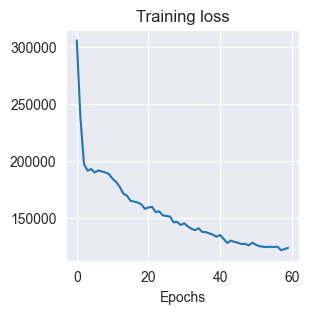

2024-05-06 14:55:49,398 : INFO : Word2Vec lifecycle event {'msg': 'training on 7898160 raw words (2032280 effective words) took 52.8s, 38454 effective words/s', 'datetime': '2024-05-06T14:55:49.398460', 'gensim': '4.3.2', 'python': '3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'train'}


(2032280, 7898160)

In [22]:
w2v_model = Word2Vec(vector_size=300, min_count=10, window=5, compute_loss = True, workers=1, epochs=60, sg=1, sample=6e-5, alpha=0.03, min_alpha=0.0005, seed=1234)
w2v_model.build_vocab(bigram[all_tokenized_sentences])  
# train the w2v model
w2v_model.train(bigram[all_tokenized_sentences], 
                total_examples=w2v_model.corpus_count,
                epochs=w2v_model.epochs,
                compute_loss = True,
                callbacks=[callback()])

We see that training loss constantly goes down, therefore we don't have underfitting.

Find similar words to 'wire'.

In [23]:
vect = w2v_model.wv.get_mean_vector(['welded', 'wire'], weights=None, pre_normalize=True, post_normalize=True, ignore_missing=False)

In [24]:
w2v_model.wv.most_similar(positive=[vect], negative=[], topn=70)

[('wire', 0.9320331811904907),
 ('welded', 0.932033121585846),
 ('solder', 0.8118802905082703),
 ('arc', 0.7946250438690186),
 ('wires', 0.793901801109314),
 ('connectors', 0.7809845209121704),
 ('enamel', 0.7716437578201294),
 ('insulated', 0.7660992741584778),
 ('along', 0.7648071050643921),
 ('wrapped', 0.7638533115386963),
 ('together', 0.7532511949539185),
 ('ends', 0.7404136657714844),
 ('strands', 0.7373015880584717),
 ('remaining', 0.7362044453620911),
 ('exposed', 0.7354509830474854),
 ('without', 0.735144317150116),
 ('bundle', 0.7346554398536682),
 ('insulated_copper', 0.7319750189781189),
 ('aluminum', 0.7286729216575623),
 ('high_temperature', 0.7241480946540833),
 ('around', 0.7227531671524048),
 ('german_translation', 0.720311164855957),
 ('attachment', 0.7197322249412537),
 ('ing', 0.7196308970451355),
 ('enamelled', 0.7177954316139221),
 ('wound', 0.7173653244972229),
 ('enough', 0.7091590762138367),
 ('thin', 0.709021270275116),
 ('axis', 0.7053680419921875),
 ('lead_

In [25]:
w2v_model.wv.most_similar(positive=['welded', 'wire'], negative=[], topn=70)

[('solder', 0.8118802905082703),
 ('arc', 0.7946250438690186),
 ('wires', 0.793901801109314),
 ('connectors', 0.7809845209121704),
 ('enamel', 0.7716437578201294),
 ('insulated', 0.7660992741584778),
 ('along', 0.7648071050643921),
 ('wrapped', 0.7638533115386963),
 ('together', 0.7532511949539185),
 ('ends', 0.7404136657714844),
 ('strands', 0.7373015880584717),
 ('remaining', 0.7362044453620911),
 ('exposed', 0.7354509830474854),
 ('without', 0.735144317150116),
 ('bundle', 0.7346554398536682),
 ('insulated_copper', 0.7319750189781189),
 ('aluminum', 0.7286729216575623),
 ('high_temperature', 0.7241480946540833),
 ('around', 0.7227531671524048),
 ('german_translation', 0.720311164855957),
 ('attachment', 0.7197322249412537),
 ('ing', 0.7196308970451355),
 ('enamelled', 0.7177954316139221),
 ('wound', 0.7173653244972229),
 ('enough', 0.7091590762138367),
 ('thin', 0.709021270275116),
 ('axis', 0.7053680419921875),
 ('lead_wires', 0.7042797803878784),
 ('solid', 0.704261064529419),
 ('

In [26]:
w2v_model.wv.most_similar(positive=['welded'], negative=[], topn=70)

[('arc', 0.8152943849563599),
 ('along', 0.8138242959976196),
 ('connectors', 0.7996708750724792),
 ('solder', 0.7874423861503601),
 ('enamel', 0.7843230962753296),
 ('together', 0.7658044099807739),
 ('attachment', 0.7504618763923645),
 ('insulated', 0.7491419315338135),
 ('ends', 0.7486479878425598),
 ('mechanically', 0.742871880531311),
 ('wire', 0.7373716831207275),
 ('modules', 0.7337843179702759),
 ('wrapped', 0.7323752045631409),
 ('wires', 0.7290646433830261),
 ('welding', 0.726886510848999),
 ('strands', 0.7244899272918701),
 ('points', 0.7235122919082642),
 ('high_temperature', 0.7199335098266602),
 ('ing', 0.719489574432373),
 ('without', 0.7172014117240906),
 ('electrically', 0.716650128364563),
 ('side', 0.7149177193641663),
 ('aluminum', 0.7093781232833862),
 ('insulated_copper', 0.7078433632850647),
 ('thin', 0.7069360017776489),
 ('exposed', 0.7068378329277039),
 ('without_contacting', 0.7067294120788574),
 ('bundle', 0.702293872833252),
 ('solid', 0.7021641731262207),


In [27]:
w2v_model.wv.most_similar(positive=['wire'], negative=[], topn=70)

[('wires', 0.7508209347724915),
 ('welded', 0.7373716235160828),
 ('solder', 0.7259562015533447),
 ('wound', 0.7014212012290955),
 ('coil', 0.6941748261451721),
 ('enamelled', 0.6929832696914673),
 ('wrapped', 0.6914981007575989),
 ('run', 0.6870441436767578),
 ('remaining', 0.679210901260376),
 ('insulated', 0.6789180040359497),
 ('around', 0.6763735413551331),
 ('onto', 0.6760720014572144),
 ('enough', 0.6695355176925659),
 ('axis', 0.6687507629394531),
 ('bundle', 0.667152464389801),
 ('metal', 0.666033923625946),
 ('arc', 0.665939450263977),
 ('exposed', 0.6640917658805847),
 ('german_translation', 0.663135290145874),
 ('attach', 0.6613928079605103),
 ('insulated_copper', 0.6566066145896912),
 ('connectors', 0.6561359763145447),
 ('enamel', 0.6540720462799072),
 ('use', 0.6532922387123108),
 ('without', 0.6531565189361572),
 ('carry', 0.6527042388916016),
 ('strands', 0.6498891711235046),
 ('aluminum', 0.6489165425300598),
 ('way', 0.6465235948562622),
 ('wire_wound', 0.64643245935

In [28]:
def tsnescatterplot(model, words_list, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = words_list
    color_list  = ['red']
    for i in words_list:
        color_list.append('red')
    color_list.pop()

    # adds the vector of the query word
    for i in words_list:
        arrays = np.append(arrays, model.wv.__getitem__([i]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar(positive=words_list, negative=[], topn=22)
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 29 dimensions with PCA
    reduc = PCA(n_components=30).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=23).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(6, 6)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 10,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(7)

    
    plt.xlim(Y[:, 0].min()-0.5, Y[:, 0].max()+0.5)
    plt.ylim(Y[:, 1].min()-0.5, Y[:, 1].max()+0.5)
            
    plt.title('t-SNE visualization')

Visualize similar words to 'wire'.

C:\Users\Sereb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Sereb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


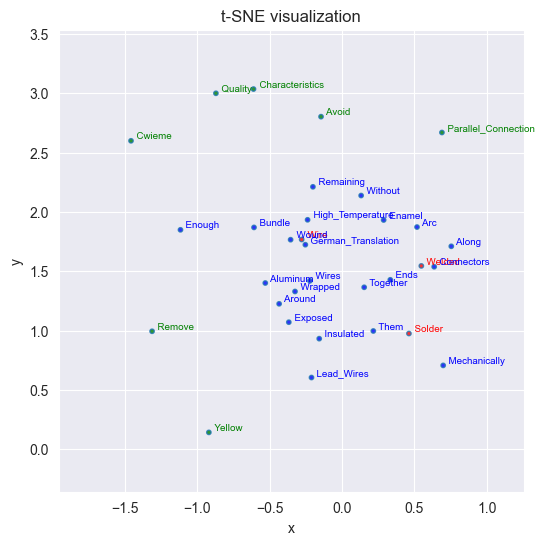

In [29]:
tsnescatterplot(w2v_model, ['welded', 'solder', 'wire'], ['characteristics', 'yellow', 'avoid', 'cwieme', 'parallel_connection', 'remove', 'quality'])

In [30]:
w2v_model.wv.most_similar(positive=['welded', 'wire', 'connectors'], negative=[], topn=70)

[('solder', 0.8394643068313599),
 ('wires', 0.8008716702461243),
 ('arc', 0.7890554666519165),
 ('along', 0.7880409359931946),
 ('together', 0.7859266400337219),
 ('wrapped', 0.7842531800270081),
 ('insulated', 0.77205890417099),
 ('enamel', 0.7698928117752075),
 ('ends', 0.7683790922164917),
 ('without', 0.763884425163269),
 ('remaining', 0.7611730098724365),
 ('attachment', 0.759920060634613),
 ('bundle', 0.7585831880569458),
 ('comprising', 0.7537598609924316),
 ('exposed', 0.7517839074134827),
 ('mechanically', 0.7515256404876709),
 ('german_translation', 0.7502238750457764),
 ('configured', 0.74297696352005),
 ('ing', 0.7424217462539673),
 ('high_temperature', 0.7420583367347717),
 ('strands', 0.7404099106788635),
 ('without_contacting', 0.7400724291801453),
 ('side', 0.7340613603591919),
 ('bad', 0.7310453057289124),
 ('two', 0.727794885635376),
 ('electrically', 0.726982831954956),
 ('respective', 0.7268436551094055),
 ('them', 0.7262994647026062),
 ('aluminum', 0.72629326581954

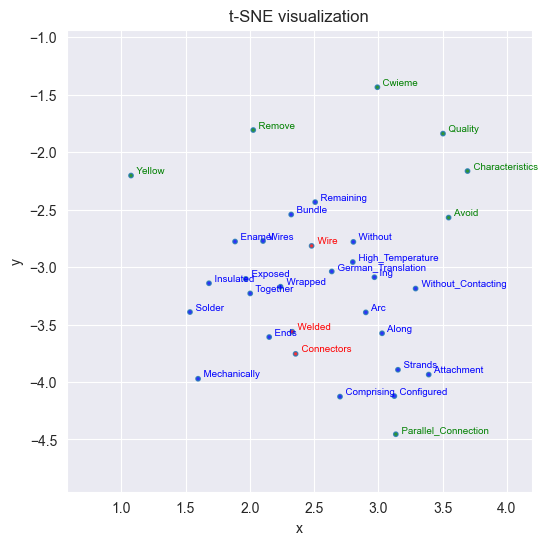

In [31]:
tsnescatterplot(w2v_model, ['welded', 'wire', 'connectors'], ['characteristics', 'yellow', 'avoid', 'cwieme', 'parallel_connection', 'remove', 'quality'])

<a id="3"></a>
## Word2vec for finding most similar articles to a word
[Back to the top](#0)

In [32]:
data_google.head()

,title,link,displayed_link,snippet,keywords,position,language,timestamp,title_cleaned,snippet_cleaned
0,Hairpin-Technologie,https://de.wikipedia.org/wiki/Hairpin-Technologie,https://de.wikipedia.org,... Kontaktieren von Statoren für elektrische ...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,hairpintechnologie,kontaktieren statoren elektrische antriebe fap...
1,EP2858212B1 - Wickelverfahren für eine Statorw...,https://patents.google.com/patent/EP2858212B1/de,https://patents.google.com,[0006]. Insbesondere das Verbinden der Leiterd...,"stator wicklung elektrisch draht spule phase ""...",1,de,04/04/2024 17:14,epb wickelverfahren statorwicklung,insbesondere verbinden leiterdrähte einzelnen ...
2,DE10321956A1 - Hairpin wound stator for electr...,https://patents.google.com/patent/DE10321956A1/en,https://patents.google.com,... verbinden. Ein Prototyp dieser Technologie...,"stator wicklung draht spule phase ""verbinden"" ...",1,de,04/04/2024 17:14,dea hairpin wound stator for electric machine,verbinden prototyp technologie wicklung phase ...
3,Stator und Verfahren zur Herstellung eines Sta...,https://patents.google.com/patent/DE1020191113...,https://patents.google.com,Zur Kontaktierung ist eine Kontakteinrichtung ...,stator wicklung draht spule wicklungsende phas...,1,de,04/04/2024 17:14,stator verfahren herstellung stators,kontaktierung kontakteinrichtung stirnseitig s...
4,risomat - Prozesse,https://www.risomat.de/prozesse/,https://www.risomat.de,Für das Wickeln von Spulen für Stator-und Roto...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,risomat prozesse,wickeln spulen statorund rotorwicklungen kommt...


In [33]:
data_google.shape

(8174, 10)

Concatenate cleaned title and snippet in `full_data_cleaned` column.

In [34]:
data_google['full_data_cleaned'] = data_google['title_cleaned'] + ' ' + data_google['snippet_cleaned']

In [35]:
data_google.head()

,title,link,displayed_link,snippet,keywords,position,language,timestamp,title_cleaned,snippet_cleaned,full_data_cleaned
0,Hairpin-Technologie,https://de.wikipedia.org/wiki/Hairpin-Technologie,https://de.wikipedia.org,... Kontaktieren von Statoren für elektrische ...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,hairpintechnologie,kontaktieren statoren elektrische antriebe fap...,hairpintechnologie kontaktieren statoren elekt...
1,EP2858212B1 - Wickelverfahren für eine Statorw...,https://patents.google.com/patent/EP2858212B1/de,https://patents.google.com,[0006]. Insbesondere das Verbinden der Leiterd...,"stator wicklung elektrisch draht spule phase ""...",1,de,04/04/2024 17:14,epb wickelverfahren statorwicklung,insbesondere verbinden leiterdrähte einzelnen ...,epb wickelverfahren statorwicklung insbesonder...
2,DE10321956A1 - Hairpin wound stator for electr...,https://patents.google.com/patent/DE10321956A1/en,https://patents.google.com,... verbinden. Ein Prototyp dieser Technologie...,"stator wicklung draht spule phase ""verbinden"" ...",1,de,04/04/2024 17:14,dea hairpin wound stator for electric machine,verbinden prototyp technologie wicklung phase ...,dea hairpin wound stator for electric machine ...
3,Stator und Verfahren zur Herstellung eines Sta...,https://patents.google.com/patent/DE1020191113...,https://patents.google.com,Zur Kontaktierung ist eine Kontakteinrichtung ...,stator wicklung draht spule wicklungsende phas...,1,de,04/04/2024 17:14,stator verfahren herstellung stators,kontaktierung kontakteinrichtung stirnseitig s...,stator verfahren herstellung stators kontaktie...
4,risomat - Prozesse,https://www.risomat.de/prozesse/,https://www.risomat.de,Für das Wickeln von Spulen für Stator-und Roto...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,risomat prozesse,wickeln spulen statorund rotorwicklungen kommt...,risomat prozesse wickeln spulen statorund roto...


In [36]:
data_google['full_data_cleaned'][0].split()

['hairpintechnologie',
 'kontaktieren',
 'statoren',
 'elektrische',
 'antriebe',
 'fapsfaude',
 'abgerufen',
 'juli',
 'zuletzt',
 'bearbeitet',
 'monaten',
 'sprachen',
 'english']

Get rid of words which are not included in the model vocabulary.

In [37]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    
    return unique_list

In [38]:
list_all = ' '.join([i for i in data_google['full_data_cleaned']]).split()
len(unique(list_all))

23998

In [39]:
list_correct = list(w2v_model.wv.index_to_key)
len(list_correct)

2049

In [40]:
remove_words = list(set(list_all).difference(list_correct))
len(remove_words)

22187

In [41]:
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
data_google['full_data_cleaned'] = data_google['full_data_cleaned'].replace(to_replace =pat, value = '', regex = True)

In [42]:
len(data_google['full_data_cleaned'])

8174

Remove rows with blank `full_data_cleaned` column.

In [43]:
data_google[data_google['full_data_cleaned'].str.isspace()]

,title,link,displayed_link,snippet,keywords,position,language,timestamp,title_cleaned,snippet_cleaned,full_data_cleaned
3320,Springorum-Denkmünze,https://prorwth.de/de/projekte-und-aktivitaete...,https://prorwth.de,Anfangsfestes Fügen als Kontaktierungsvorberei...,"stator wicklung phase ""kontaktierung"" technologie",88,de,04/04/2024 17:14,springorumdenkmünze,anfangsfestes fügen kontaktierungsvorbereitung...,


In [44]:
data_google = data_google[~data_google['full_data_cleaned'].str.isspace()]

In [45]:
len(data_google)

8173

In [46]:
data_google.reset_index(drop=True, inplace=True)

Create a vector of mean vectors for each row of `full_data_cleaned` column.

In [47]:
vectors_list = []
for i in range(len(data_google['full_data_cleaned'])):
    vectors_list.append(w2v_model.wv.get_mean_vector(data_google['full_data_cleaned'][i].split(), weights=None, pre_normalize=True, post_normalize=True, ignore_missing=False))

In [48]:
len(vectors_list)

8173

In [49]:
sum(vectors_list[0] == w2v_model.wv.get_mean_vector(data_google['full_data_cleaned'][0].split(), weights=None, pre_normalize=True, post_normalize=True, ignore_missing=False))

300

Find most similar articles to the word or sequence of words.

In [50]:
def most_similar_texts(model, data, vectors, search, topn=10):
    mean = model.wv.get_mean_vector(search, weights=None, pre_normalize=True, post_normalize=True, ignore_missing=False)
    dists = np.dot(vectors, mean) / np.linalg.norm(vectors, axis=1)
    if not topn:
        return dists
    best = matutils.argsort(dists, topn=topn, reverse=True)
    result = [
            (sim, data['title'][sim], data['snippet'][sim], float(dists[sim])) for sim in best
        ]
    return result

In [51]:
most_similar_texts(w2v_model, data_google, vectors_list, ['welded', 'wire', 'connectors'], topn=10)

[(4913,
  'Bondable Magnet Wire',
  'When the bond coat hardens, adjacent wires in direct contact with each other will be bonded together. Potential Advantages. Use of bondable wire allows coils to ...',
  0.9140838384628296),
 (7553,
  'Lucas 11AC AL terminal and charging questions - E-Type',
  "So I'm going to chop off the plastic connector block and attach new female connectors to the wire ends to ensure a secure connection I can ...",
  0.9083893299102783),
 (5912,
  '4.8: Automotive Alternator',
  'I recommend that you solder ring-lug terminals to your wires, and attach them underneath the terminal nuts along with the stator wire ends so ...',
  0.906590461730957),
 (7491,
  'What is the best way to insulate magnet wire from each ...',
  'If you do not use the fixed lug then wrap the magnet wire around your connector wire solder the connection. Insulate the joint. Attach the ...',
  0.8974007368087769),
 (5935,
  'Spot welding of enamelled wires on stator',
  'The enamelled copper

In [52]:
def Extract(lst):
    return [item[0] for item in lst]

In [53]:
[item[1] for item in most_similar_texts(w2v_model, data_google, vectors_list, ['welded', 'wire', 'connectors'], topn=10)]

['Bondable Magnet Wire',
 'Lucas 11AC AL terminal and charging questions - E-Type',
 '4.8: Automotive Alternator',
 'What is the best way to insulate magnet wire from each ...',
 'Spot welding of enamelled wires on stator',
 'Can I use soldered pieces of wires to make a coil?',
 'What is the best way to solder wires to copper windings ...',
 'Good way to connect two different gauge wires?',
 'Add "W" terminal wire to Bosch/Valeo serp-belt TDI alternator',
 'Magnet Wire']

In [54]:
most_similar_texts(w2v_model, data_google, vectors_list, ['welded', 'wire', 'connectors'], topn=10)[0][0]

4913

In [55]:
def tsnescatterplot_texts(vectors_list, model, most_similar_texts, words_list):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = ['mean_vector']
    color_list  = ['red']
    #for i in words_list:
     #   color_list.append('red')
    #color_list.pop()
    # adds the vector of the query word
    #for i in words_list:
     #   arrays = np.append(arrays, model.wv.__getitem__([i]), axis=0)
    arrays = np.append(arrays, [model.wv.get_mean_vector(words_list, weights=None, pre_normalize=True, post_normalize=True, ignore_missing=False)], axis=0)
    
    
    # gets list of most similar words
    #close_words = model.wv.most_similar(positive=words_list, negative=[], topn=22)
    close_words = [item[1] for item in most_similar_texts]
    
    # adds the vector for each of the closest words to the array
    i = 0
    for wrd_score in close_words:
        wrd_vector = [vectors_list[most_similar_texts[i][0]]]
        i = i + 1
        word_labels.append(wrd_score)
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    #for wrd in list_names:
     #   wrd_vector = model.wv.__getitem__([wrd])
      #  word_labels.append(wrd)
       # color_list.append('green')
        #arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 29 dimensions with PCA
    reduc = PCA(n_components=11).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(6, 6)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 10,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(7)

    
    plt.xlim(Y[:, 0].min()-0.5, Y[:, 0].max()+0.5)
    plt.ylim(Y[:, 1].min()-0.5, Y[:, 1].max()+0.5)
            
    plt.title('t-SNE visualization')

Visualize the cluster of most similar articles to the mean vector of embeddings of words.

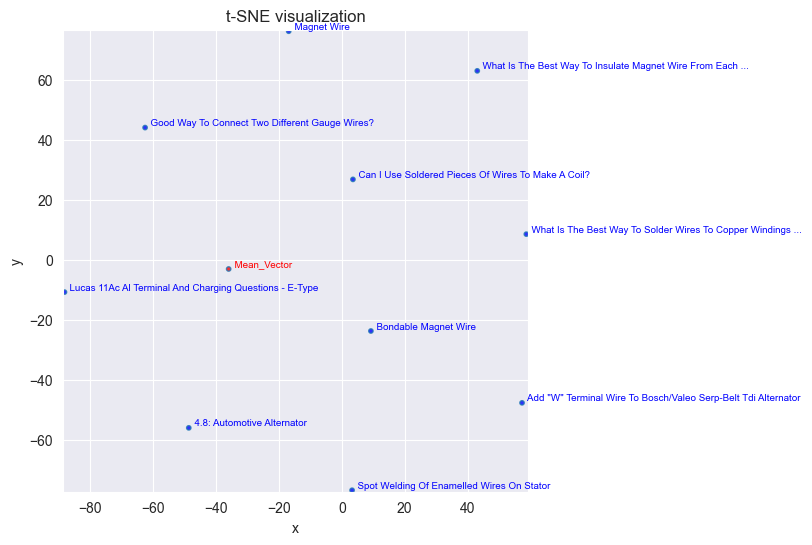

In [56]:
tsnescatterplot_texts(vectors_list, w2v_model, most_similar_texts(w2v_model, data_google, vectors_list, ['welded', 'wire', 'connectors'], topn=10), ['welded', 'wire', 'connectors'])

## SBERT

In [57]:
from sentence_transformers import SentenceTransformer
import pickle
import scipy
import nltk

C:\Users\Sereb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sereb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
data_google['snippet'].iloc[0]

'... Kontaktieren von Statoren für elektrische Antriebe. In: faps.fau.de. Abgerufen am 20. Juli 2021. Zuletzt bearbeitet vor 4 Monaten. Sprachen. English.'

In [60]:
data_google.head()

,title,link,displayed_link,snippet,keywords,position,language,timestamp,title_cleaned,snippet_cleaned,full_data_cleaned
0,Hairpin-Technologie,https://de.wikipedia.org/wiki/Hairpin-Technologie,https://de.wikipedia.org,... Kontaktieren von Statoren für elektrische ...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,hairpintechnologie,kontaktieren statoren elektrische antriebe fap...,kontaktieren statoren elektrische antriebe ...
1,EP2858212B1 - Wickelverfahren für eine Statorw...,https://patents.google.com/patent/EP2858212B1/de,https://patents.google.com,[0006]. Insbesondere das Verbinden der Leiterd...,"stator wicklung elektrisch draht spule phase ""...",1,de,04/04/2024 17:14,epb wickelverfahren statorwicklung,insbesondere verbinden leiterdrähte einzelnen ...,epb statorwicklung insbesondere verbinden ei...
2,DE10321956A1 - Hairpin wound stator for electr...,https://patents.google.com/patent/DE10321956A1/en,https://patents.google.com,... verbinden. Ein Prototyp dieser Technologie...,"stator wicklung draht spule phase ""verbinden"" ...",1,de,04/04/2024 17:14,dea hairpin wound stator for electric machine,verbinden prototyp technologie wicklung phase ...,dea hairpin wound stator for electric machine ...
3,Stator und Verfahren zur Herstellung eines Sta...,https://patents.google.com/patent/DE1020191113...,https://patents.google.com,Zur Kontaktierung ist eine Kontakteinrichtung ...,stator wicklung draht spule wicklungsende phas...,1,de,04/04/2024 17:14,stator verfahren herstellung stators,kontaktierung kontakteinrichtung stirnseitig s...,stator verfahren herstellung stators kontaktie...
4,risomat - Prozesse,https://www.risomat.de/prozesse/,https://www.risomat.de,Für das Wickeln von Spulen für Stator-und Roto...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,risomat prozesse,wickeln spulen statorund rotorwicklungen kommt...,wickeln spulen kommt flyer bzw kontaktier...


Concatenate title and snippet in `full_data` column.

In [61]:
data_google['full_data'] = data_google['title'] + '. ' + data_google['snippet']

In [62]:
data_google.head()

,title,link,displayed_link,snippet,keywords,position,language,timestamp,title_cleaned,snippet_cleaned,full_data_cleaned,full_data
0,Hairpin-Technologie,https://de.wikipedia.org/wiki/Hairpin-Technologie,https://de.wikipedia.org,... Kontaktieren von Statoren für elektrische ...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,hairpintechnologie,kontaktieren statoren elektrische antriebe fap...,kontaktieren statoren elektrische antriebe ...,Hairpin-Technologie. ... Kontaktieren von Stat...
1,EP2858212B1 - Wickelverfahren für eine Statorw...,https://patents.google.com/patent/EP2858212B1/de,https://patents.google.com,[0006]. Insbesondere das Verbinden der Leiterd...,"stator wicklung elektrisch draht spule phase ""...",1,de,04/04/2024 17:14,epb wickelverfahren statorwicklung,insbesondere verbinden leiterdrähte einzelnen ...,epb statorwicklung insbesondere verbinden ei...,EP2858212B1 - Wickelverfahren für eine Statorw...
2,DE10321956A1 - Hairpin wound stator for electr...,https://patents.google.com/patent/DE10321956A1/en,https://patents.google.com,... verbinden. Ein Prototyp dieser Technologie...,"stator wicklung draht spule phase ""verbinden"" ...",1,de,04/04/2024 17:14,dea hairpin wound stator for electric machine,verbinden prototyp technologie wicklung phase ...,dea hairpin wound stator for electric machine ...,DE10321956A1 - Hairpin wound stator for electr...
3,Stator und Verfahren zur Herstellung eines Sta...,https://patents.google.com/patent/DE1020191113...,https://patents.google.com,Zur Kontaktierung ist eine Kontakteinrichtung ...,stator wicklung draht spule wicklungsende phas...,1,de,04/04/2024 17:14,stator verfahren herstellung stators,kontaktierung kontakteinrichtung stirnseitig s...,stator verfahren herstellung stators kontaktie...,Stator und Verfahren zur Herstellung eines Sta...
4,risomat - Prozesse,https://www.risomat.de/prozesse/,https://www.risomat.de,Für das Wickeln von Spulen für Stator-und Roto...,"stator wicklung ""kontaktieren"" -""kontaktieren ...",1,de,04/04/2024 17:14,risomat prozesse,wickeln spulen statorund rotorwicklungen kommt...,wickeln spulen kommt flyer bzw kontaktier...,risomat - Prozesse. Für das Wickeln von Spulen...


In [63]:
sent_tokenize(data_google['full_data'].iloc[0])

['Hairpin-Technologie.',
 '... Kontaktieren von Statoren für elektrische Antriebe.',
 'In: faps.fau.de.',
 'Abgerufen am 20.',
 'Juli 2021.',
 'Zuletzt bearbeitet vor 4 Monaten.',
 'Sprachen.',
 'English.']

Create a list of sentences and map each sentence to the article that it belongs to.

In [64]:
sen_list = []
file_name_col = []
for i, text in enumerate(data_google['full_data']):
    text = data_google['full_data'].iloc[i]
    sentences = sent_tokenize(text)
    sen_list.extend(sentences)
    file_list = [data_google['title'].iloc[i] for j in sentences]
    file_name_col.extend(file_list)

In [65]:
data_google['full_data'][0]

'Hairpin-Technologie. ... Kontaktieren von Statoren für elektrische Antriebe. In: faps.fau.de. Abgerufen am 20. Juli 2021. Zuletzt bearbeitet vor 4 Monaten. Sprachen. English.'

In [66]:
sen_list[7]

'English.'

In [67]:
file_name_col[7]

'Hairpin-Technologie'

Initialize and train the SBERT model on the created list of sentences.

In [68]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

2024-04-23 10:52:49,423 : INFO : Load pretrained SentenceTransformer: sentence-transformers/paraphrase-multilingual-mpnet-base-v2
2024-04-23 10:53:01,235 : INFO : Use pytorch device_name: cpu


In [69]:
sentence_embeddings = model.encode(sent_tokenize(data_google['full_data'].iloc[0]))
sentence_embeddings

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:07<00:00,  7.34s/it]


array([[-0.05578271, -0.07036623, -0.01331934, ...,  0.01865406,
        -0.12789622, -0.2026266 ],
       [-0.07854325, -0.05526515, -0.01602701, ..., -0.00011078,
        -0.19582756, -0.10112429],
       [-0.07079799, -0.14270048, -0.01279164, ..., -0.06054876,
         0.22419633, -0.07021431],
       ...,
       [-0.0226165 ,  0.16130336, -0.0144545 , ...,  0.07210565,
        -0.04214881, -0.09329886],
       [-0.05620201,  0.00810377, -0.01720888, ...,  0.00359833,
         0.05738701, -0.06188598],
       [-0.1260186 ,  0.02248489, -0.0149513 , ...,  0.03376996,
        -0.03646057, -0.11190964]], dtype=float32)

In [70]:
sentence_embeddings.shape

(8, 768)

In [71]:
start_time = time.time()

#Start the multi-process pool on all available CUDA devices or CPU cores
pool = model.start_multi_process_pool()

#Compute the embeddings using the multi-process pool
sentence_embeddings = model.encode_multi_process(sen_list, pool)

model.stop_multi_process_pool(pool)
print("Time taken:", time.time()-start_time)
#sentence_embeddings = model.encode(sen_list)

2024-04-23 10:53:08,706 : INFO : CUDA/NPU is not available. Starting 4 CPU workers
2024-04-23 10:53:08,706 : INFO : Start multi-process pool on devices: cpu, cpu, cpu, cpu


Time taken: 1024.2090702056885


In [75]:
model.save("model1")

2024-04-23 11:12:30,306 : INFO : Save model to model1


Make up a query.

In [72]:
query = 'Can I use soldered pieces of wires to make a coil?' 
number_top_matches = 10

In [73]:
query_embeddings = model.encode([query]) 

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


In [74]:
print("Semantic Search Results")
# Computing the cosine distances between the query's embeddings
# and the embeddings of the documents.
distances = scipy.spatial.distance.cdist(query_embeddings, sentence_embeddings, "cosine")[0]

results = zip(range(len(distances)), distances)

# Sorting results based on the cosine distances in an ascending order.
results = sorted(results, key=lambda x: x[1]) 

print("\n\n======================\n\n")
print("Query:", query)
print(f"\nTop {number_top_matches} most similar sentences in corpus:")

# Displaying the top matches
for idx, distance in results[:number_top_matches]:
    print(sen_list[idx].strip(), f"\n(Cosine Score: {round((1-distance) * 100,2)}% , Doc Name: {file_name_col[idx]})\n" )

Semantic Search Results




Query: Can I use soldered pieces of wires to make a coil?

Top 10 most similar sentences in corpus:
Can I use soldered pieces of wires to make a coil?. 
(Cosine Score: 99.66% , Doc Name: Can I use soldered pieces of wires to make a coil?)

This coil can be either one wire, or several wires ... way of doing it other than it spreads the wire out a little more. 
(Cosine Score: 83.01% , Doc Name: Brushless motor winding class)

Use of bondable wire allows coils to ... 
(Cosine Score: 82.22% , Doc Name: Bondable Magnet Wire)

Coil winding and assembly solutions. 
(Cosine Score: 81.19% , Doc Name: Coil winding and assembly solutions)

Connect coils by means of silver soldering. 
(Cosine Score: 80.99% , Doc Name: Motor Winder (Nashville, TN) - Southwest Electric Co.)

Coil Wire Binding Machine. 
(Cosine Score: 80.68% , Doc Name: SMT-DW300 Winding Lacing Machine Single Phase Motor ...)

Attach material to take-up coil. 
(Cosine Score: 80.65% , Doc Name: Apply for Co